<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/Multi_Linea_Regression_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
dataset = pd.read_csv('/content/50_Startups.csv')

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.columns = ['RD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit']

In [ ]:
dataset.head()

,RD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X=dataset.iloc[:,:-1].values # All rows all columns but not last value .
y=dataset.iloc[:,4].values # All rows and fourth column which is profit, dependent variable 
# here in x independent variables like country age and salary. y is dependet variables which is profit

In [ ]:
X[0:10]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California']], dtype=object)

In [ ]:
y[0:10]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96])

In [ ]:
#Encode Catagorical value which is country
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #since there are multiple data sets such as Germany, spain, France so use onehotencoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough') # index 3 for country column. remaining columns passthorugh
X = np.array(ct.fit_transform(X))

In [ ]:
X[0:10]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [ ]:
#avoid dummy variable by eliminating first column
X=X[:,1:]

In [ ]:
X[0:10]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [ ]:
#fitting model or training data set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict value swith X_test variables
y_pred = regressor.predict(X_test)

In [ ]:
print(y_test)
print(y_pred)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]


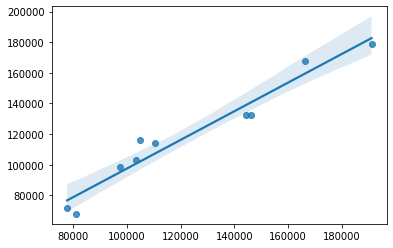

In [ ]:
sns.regplot(x=y_test,y=y_pred)

There is no wide differene between the test and predited values


In [ ]:
#here as per the multiple linear regression equation we need to add the constant b0.
#Building optiamal model
import statsmodels.api as sm
X= np.append(arr =np.ones((50,1)).astype(int),values=X,axis=1) # adding contant 1

In [ ]:
X[1:10]

array([[1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [ ]:
#Back word elimination
X_opt = X[:, [0,1,2,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS= sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        10:18:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Form the above analysis the P value lessthan 0.05 is ( P>|t|) is x3 which is R_D Spend. So from this regression analysis variable affecting profit is R&D spend**

In [ ]:
model = smf.ols("Profit~RD_Spend",data = dataset).fit() #ordinary least squaring method
model1= smf.ols("Profit~RD_Spend+Administration+MarketingSpend+State",data = dataset).fit() #ordinary least squaring method

In [ ]:
newdata=pd.Series([150000])
data_pred=pd.DataFrame(newdata,columns=['RD_Spend'])
print(newdata)
print(data_pred)

0    150000
dtype: int64
   RD_Spend
0    150000


In [ ]:
model.predict(data_pred) #predct profit foe RD_spend 150000

0    177176.604782
dtype: float64

In [ ]:
model.params

Intercept    49032.899141
RD_Spend         0.854291
dtype: float64

In [ ]:
# Manually calculate for 5 and 6 years experience salary
Profit_150000 = (49032.899141) + (0.854291)*(150000)
print('For R&D Spend 150000, profit - ', Profit_150000)

For R&D Spend 150000, profit -  177176.54914100002


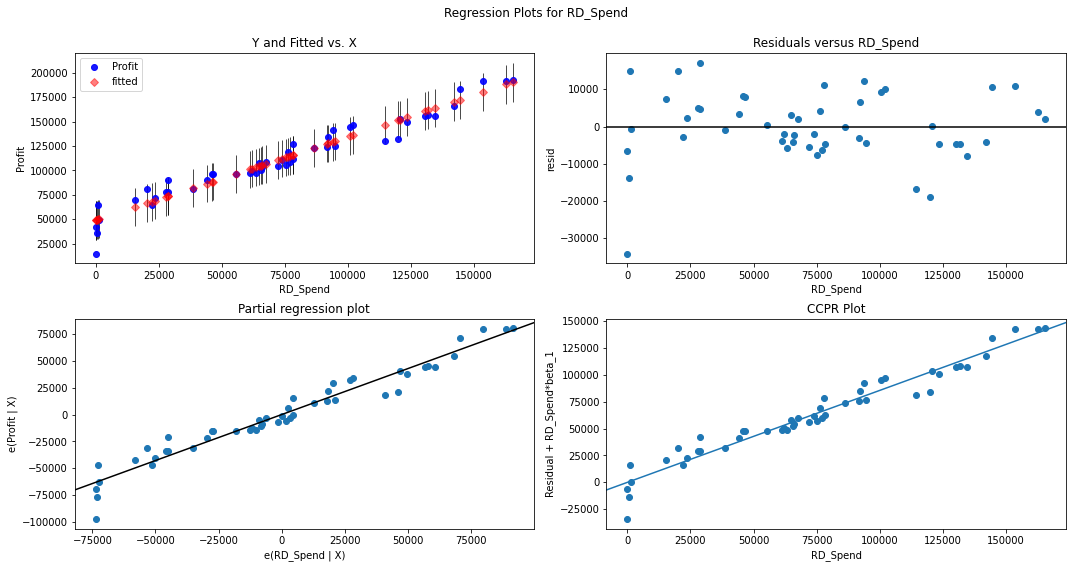

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD_Spend',fig=fig)
plt.show()

In [ ]:
model.rsquared 

0.9465353160804393

In [ ]:
model1.rsquared

0.9507524843355148